In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

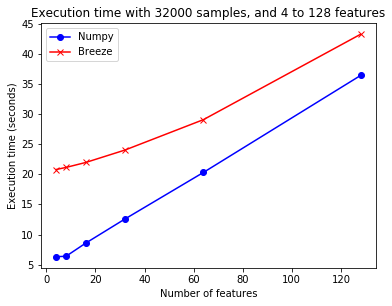

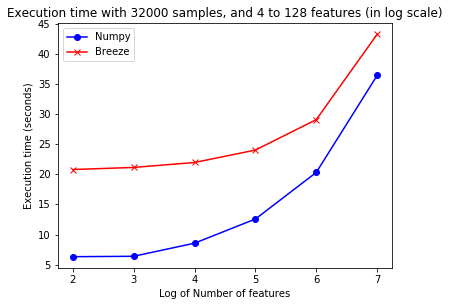

In [106]:
x = np.array([4, 8, 16, 32, 64, 128])
dim_py = np.array([6.333825354, 6.398121999, 8.572502396, 12.582088585, 20.314978511, 36.398928026])
dim_scala = np.array([20.798034210, 21.143162595, 21.962111205, 24.024125482, 29.074358590, 43.234753866])

plt.figure(figsize=(6,4.5))
plt.plot(x, dim_py, marker='o', color='blue', label="Numpy")
plt.plot(x, dim_scala, marker='x', color='red', label="Breeze")
plt.xlabel('Number of features')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time with 32000 samples, and 4 to 128 features')
plt.legend()
plt.show()

plt.figure(figsize=(6,4.5))
plt.plot(np.log2(x), dim_py, marker='o', color='blue', label="Numpy")
plt.plot(np.log2(x), dim_scala, marker='x', color='red', label="Breeze")
plt.xlabel('Log of Number of features')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time with 32000 samples, and 4 to 128 features (in log scale)')
plt.legend()
plt.show()

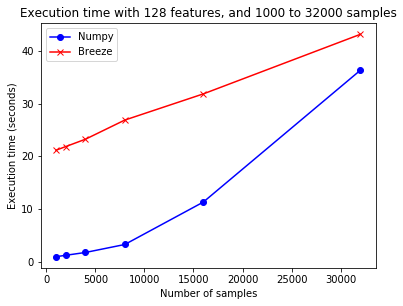

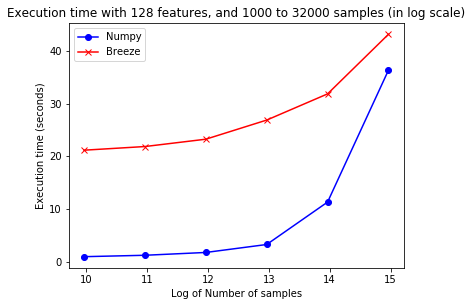

In [107]:
x = [1000, 2000, 4000, 8000, 16000, 32000] 
sample_py = [0.917522254, 1.186010636, 1.721292353, 3.235534791, 11.309076611, 36.398928026]
sample_scala = [21.181930089, 21.877403884, 23.273996323, 26.912044470, 31.895235254, 43.234753866]

plt.figure(figsize=(6,4.5))
plt.plot(x, sample_py, marker='o', color='blue', label="Numpy")
plt.plot(x, sample_scala, marker='x', color='red', label="Breeze")
plt.xlabel('Number of samples')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time with 128 features, and 1000 to 32000 samples')
plt.legend()
plt.show()

plt.figure(figsize=(6,4.5))
plt.plot(np.log2(x), sample_py, marker='o', color='blue', label="Numpy")
plt.plot(np.log2(x), sample_scala, marker='x', color='red', label="Breeze")
plt.xlabel('Log of Number of samples')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time with 128 features, and 1000 to 32000 samples (in log scale)')
plt.legend()
plt.show()

In [108]:
df_py = pd.read_csv('./py/interval500.csv')
df_scala = pd.read_csv('./scala/interval500.csv')

In [122]:
def extract_df(df):
    cycles, instructions, branches, branch_misses = np.array([]), np.array([]), np.array([]), np.array([])
    L1_dcache_load_misses, L1_icache_load_misses = np.array([]), np.array([])
    LLC_load_misses, LLC_store_misses, l2_rqsts_miss = np.array([]), np.array([]), np.array([])

    for row in df.iterrows():
        field, val = row[0][3], row[0][1]
        if field == 'cycles':
            cycles = np.append(cycles, val)
        elif field == 'instructions':
            instructions = np.append(instructions, val)
        elif field == 'branches':
            branches = np.append(branches, val)
        elif field == 'branch-misses':
            branch_misses = np.append(branch_misses, val)
        elif field == 'L1-dcache-load-misses':
            L1_dcache_load_misses = np.append(L1_dcache_load_misses, val)
        elif field == 'L1-icache-load-misses':
            L1_icache_load_misses = np.append(L1_icache_load_misses, val)
        elif field == 'LLC-load-misses':
            LLC_load_misses = np.append(LLC_load_misses, val)
        elif field == 'LLC-store-misses':
            LLC_store_misses = np.append(LLC_store_misses, val)
        elif field == 'l2_rqsts.miss':
            l2_rqsts_miss = np.append(l2_rqsts_miss, val)
            
    IPC_trace = np.divide(instructions, cycles)
    MPKI_branch_misses = np.divide(instructions, instructions)*1000
    MPKI_L1_dcache_load_misses = np.divide(L1_dcache_load_misses, instructions)*1000
    MPKI_L1_icache_load_misses = np.divide(L1_icache_load_misses, instructions)*1000
    MPKI_LLC_load_misses = np.divide(LLC_load_misses, instructions)*1000
    MPKI_LLC_store_misses = np.divide(LLC_store_misses, instructions)*1000
    MPKI_l2_rqsts_miss = np.divide(l2_rqsts_miss, instructions)*1000
    
    return IPC_trace, MPKI_branch_misses, MPKI_L1_dcache_load_misses, MPKI_L1_icache_load_misses, \
MPKI_LLC_load_misses, MPKI_LLC_store_misses, MPKI_l2_rqsts_miss

IPC_trace_py, MPKI_branch_misses_py, MPKI_L1_dcache_load_misses_py, MPKI_L1_icache_load_misses_py, \
MPKI_LLC_load_misses_py, MPKI_LLC_store_misses_py, MPKI_l2_rqsts_miss_py = extract_df(df_py)

IPC_trace_scala, MPKI_branch_misses_scala, MPKI_L1_dcache_load_misses_scala, MPKI_L1_icache_load_misses_scala, \
MPKI_LLC_load_misses_scala, MPKI_LLC_store_misses_scala, MPKI_l2_rqsts_miss_scala = extract_df(df_scala)

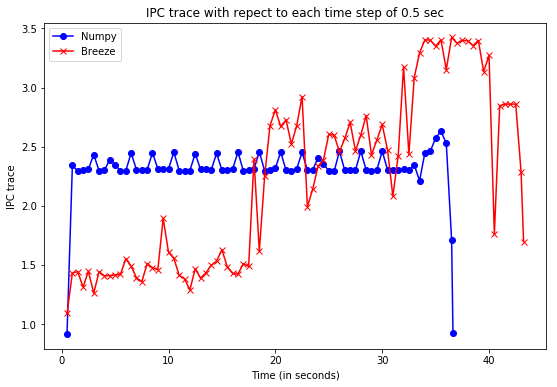

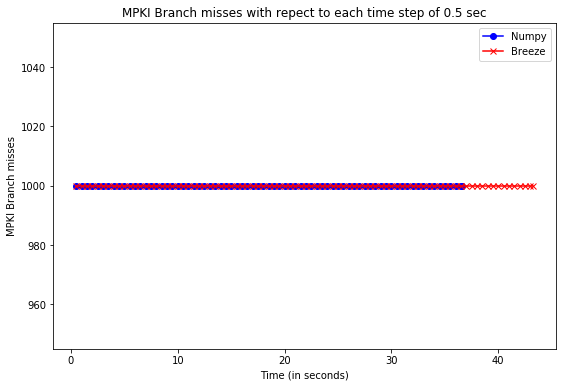

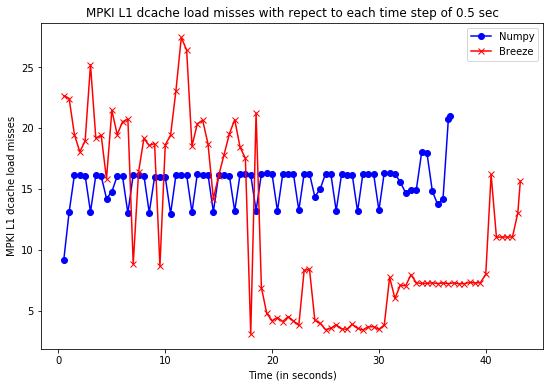

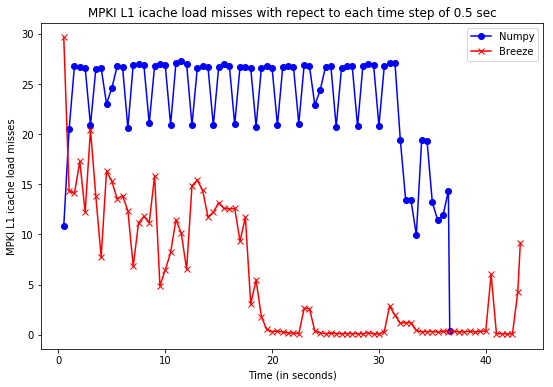

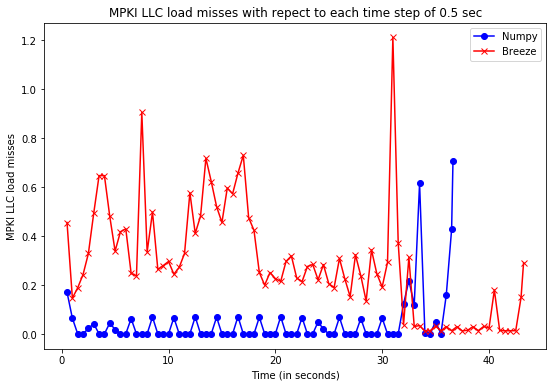

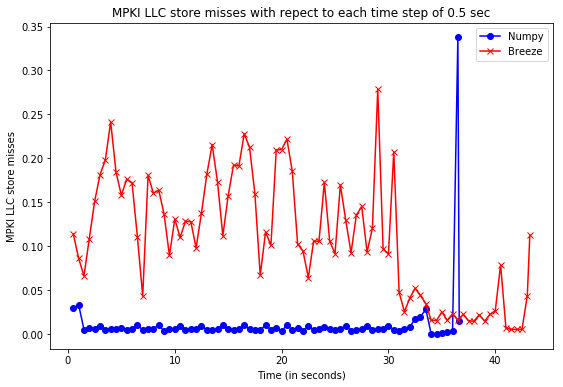

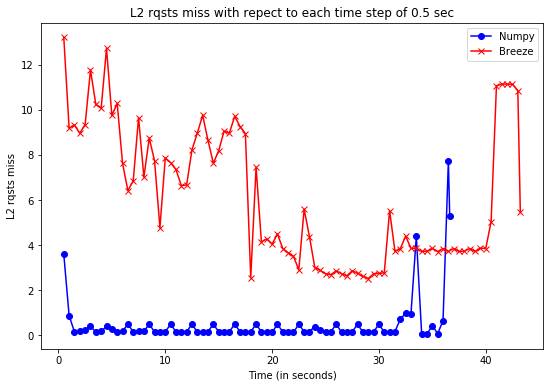

In [127]:
def plot(x_py, x_scala, y_py, y_scala, label):
    plt.figure(figsize=(9,6))
    plt.plot(x_py, y_py, marker='o', color='blue', label="Numpy")
    plt.plot(x_scala, y_scala, marker='x', color='red', label="Breeze")
    plt.xlabel('Time (in seconds)')
    plt.ylabel(label)
    plt.title(label + ' with repect to each time step of 0.5 sec')
    plt.legend()
    plt.show()

time_py = np.array([0.5*i for i in range(1,74)] + [36.62628706])
time_scala = np.array([0.5*i for i in range(1,87)] + [43.234753866])

plot(time_py, time_scala, IPC_trace_py, IPC_trace_scala, 'IPC trace')
plot(time_py, time_scala, MPKI_branch_misses_py, MPKI_branch_misses_scala, 'MPKI Branch misses')
plot(time_py, time_scala, MPKI_L1_dcache_load_misses_py, MPKI_L1_dcache_load_misses_scala, 'MPKI L1 dcache load misses')
plot(time_py, time_scala, MPKI_L1_icache_load_misses_py, MPKI_L1_icache_load_misses_scala, 'MPKI L1 icache load misses')
plot(time_py, time_scala, MPKI_LLC_load_misses_py, MPKI_LLC_load_misses_scala, 'MPKI LLC load misses')
plot(time_py, time_scala, MPKI_LLC_store_misses_py, MPKI_LLC_store_misses_scala, 'MPKI LLC store misses')
plot(time_py, time_scala, MPKI_l2_rqsts_miss_py, MPKI_l2_rqsts_miss_scala, 'L2 rqsts miss')
